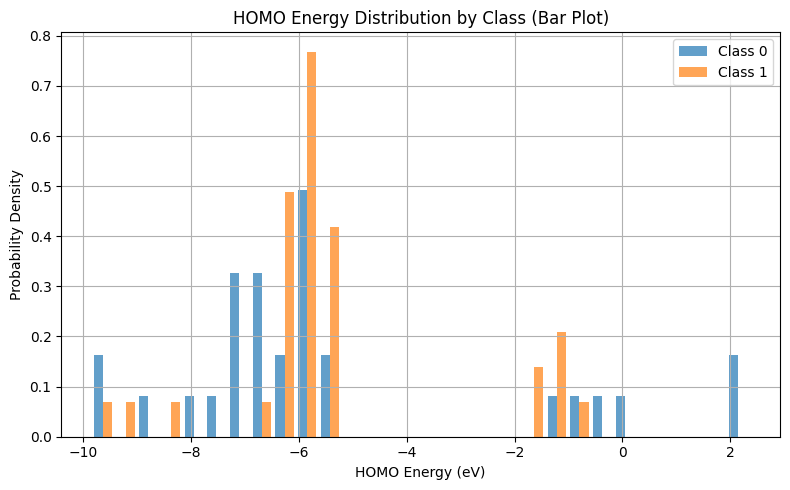

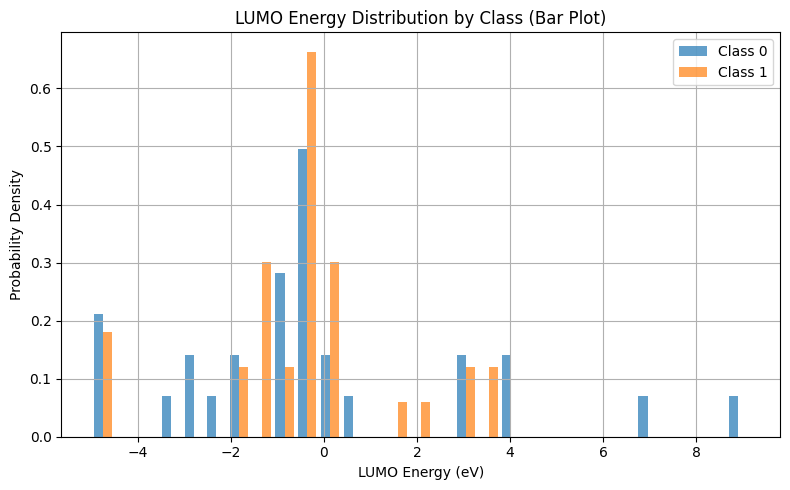

✅ Bar plots and CSVs saved for HOMO and LUMO probability distributions.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Load your CSV file
# -----------------------------
df = pd.read_csv("HOMO-LUMO-63mols.csv")  # Replace with your actual file name

# Standardize column names
df.columns = [col.strip() for col in df.columns]
homo_col = "HOMO" if "HOMO" in df.columns else "HOMO (eV)"
lumo_col = "LUMO" if "LUMO" in df.columns else "LUMO (eV)"

# -----------------------------
# Separate classes
# -----------------------------
class_0 = df[df["Class"] == 0]
class_1 = df[df["Class"] == 1]

# -----------------------------
# Define bins
# -----------------------------
homo_bins = np.linspace(df[homo_col].min(), df[homo_col].max(), 30)
lumo_bins = np.linspace(df[lumo_col].min(), df[lumo_col].max(), 30)

# -----------------------------
# HOMO Distribution
# -----------------------------
h0_counts, h_bins = np.histogram(class_0[homo_col], bins=homo_bins, density=True)
h1_counts, _ = np.histogram(class_1[homo_col], bins=homo_bins, density=True)
homo_centers = 0.5 * (h_bins[1:] + h_bins[:-1])

homo_df = pd.DataFrame({
    "HOMO Energy (eV)": homo_centers,
    "Class_0_Probability": h0_counts,
    "Class_1_Probability": h1_counts
})
homo_df.to_csv("HOMO_probability_distribution.csv", index=False)

# Bar Plot HOMO
bar_width = (homo_centers[1] - homo_centers[0]) * 0.4
plt.figure(figsize=(8, 5))
plt.bar(homo_centers - bar_width/2, h0_counts, width=bar_width, label="Class 0", alpha=0.7)
plt.bar(homo_centers + bar_width/2, h1_counts, width=bar_width, label="Class 1", alpha=0.7)
plt.xlabel("HOMO Energy (eV)")
plt.ylabel("Probability Density")
plt.title("HOMO Energy Distribution by Class (Bar Plot)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------------
# LUMO Distribution
# -----------------------------
l0_counts, l_bins = np.histogram(class_0[lumo_col], bins=lumo_bins, density=True)
l1_counts, _ = np.histogram(class_1[lumo_col], bins=lumo_bins, density=True)
lumo_centers = 0.5 * (l_bins[1:] + l_bins[:-1])

lumo_df = pd.DataFrame({
    "LUMO Energy (eV)": lumo_centers,
    "Class_0_Probability": l0_counts,
    "Class_1_Probability": l1_counts
})
lumo_df.to_csv("LUMO_probability_distribution.csv", index=False)

# Bar Plot LUMO
bar_width = (lumo_centers[1] - lumo_centers[0]) * 0.4
plt.figure(figsize=(8, 5))
plt.bar(lumo_centers - bar_width/2, l0_counts, width=bar_width, label="Class 0", alpha=0.7)
plt.bar(lumo_centers + bar_width/2, l1_counts, width=bar_width, label="Class 1", alpha=0.7)
plt.xlabel("LUMO Energy (eV)")
plt.ylabel("Probability Density")
plt.title("LUMO Energy Distribution by Class (Bar Plot)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("✅ Bar plots and CSVs saved for HOMO and LUMO probability distributions.")

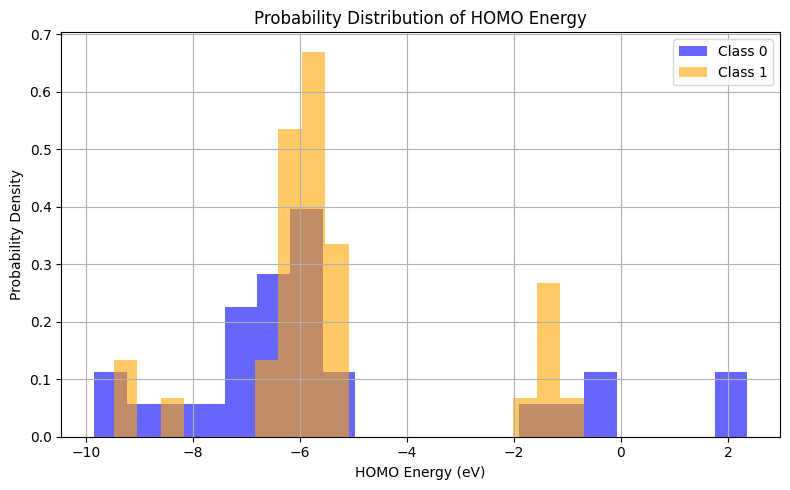

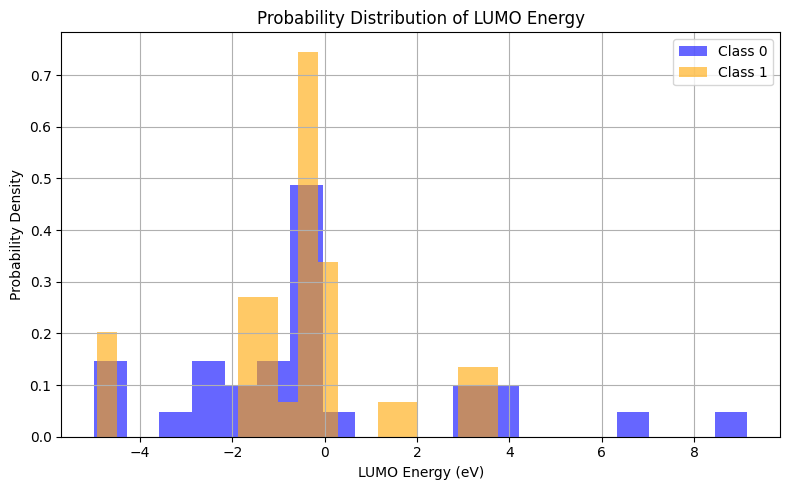

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("HOMO-LUMO-63mols.csv")  # Replace with your actual file name

# Optional: Adjust column names if needed
df.columns = [col.strip() for col in df.columns]  # Clean up whitespace
homo_col = "HOMO" if "HOMO" in df.columns else "HOMO (eV)"
lumo_col = "LUMO" if "LUMO" in df.columns else "LUMO (eV)"

# Split data by class
class_0 = df[df["Class"] == 0]
class_1 = df[df["Class"] == 1]

# Plot HOMO distributions
plt.figure(figsize=(8, 5))
plt.hist(class_0[homo_col], bins=20, density=True, alpha=0.6, label="Class 0", color="blue")
plt.hist(class_1[homo_col], bins=20, density=True, alpha=0.6, label="Class 1", color="orange")
plt.xlabel("HOMO Energy (eV)")
plt.ylabel("Probability Density")
plt.title("Probability Distribution of HOMO Energy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot LUMO distributions
plt.figure(figsize=(8, 5))
plt.hist(class_0[lumo_col], bins=20, density=True, alpha=0.6, label="Class 0", color="blue")
plt.hist(class_1[lumo_col], bins=20, density=True, alpha=0.6, label="Class 1", color="orange")
plt.xlabel("LUMO Energy (eV)")
plt.ylabel("Probability Density")
plt.title("Probability Distribution of LUMO Energy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


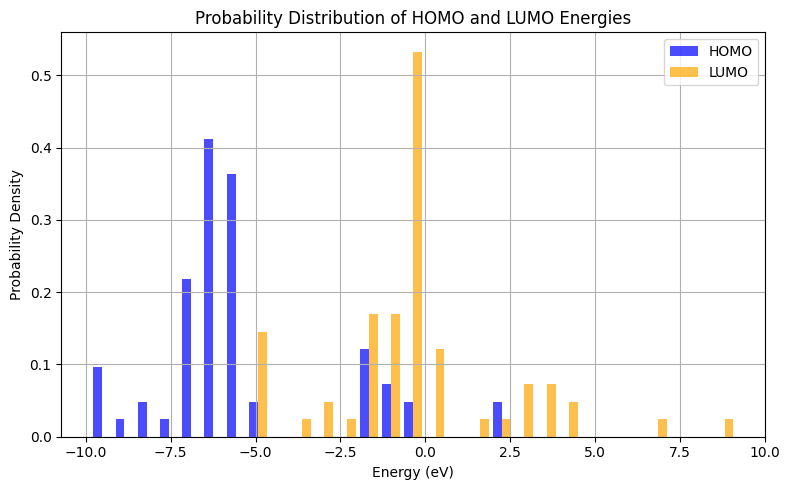

✅ Probability distribution CSV and plot created successfully.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Load your CSV file
# -----------------------------
df = pd.read_csv("HOMO-LUMO-63mols-noclass.csv")  # Replace with your actual filename

# Clean column names
df.columns = [col.strip() for col in df.columns]
homo_col = "HOMO" if "HOMO" in df.columns else "HOMO (eV)"
lumo_col = "LUMO" if "LUMO" in df.columns else "LUMO (eV)"

# -----------------------------
# Define common bin range for both HOMO and LUMO
# -----------------------------
combined_min = min(df[homo_col].min(), df[lumo_col].min())
combined_max = max(df[homo_col].max(), df[lumo_col].max())
bins = np.linspace(combined_min, combined_max, 30)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# -----------------------------
# Calculate histograms (PDFs)
# -----------------------------
homo_counts, _ = np.histogram(df[homo_col], bins=bins, density=True)
lumo_counts, _ = np.histogram(df[lumo_col], bins=bins, density=True)

# -----------------------------
# Save to CSV for Origin
# -----------------------------
prob_df = pd.DataFrame({
    "Energy (eV)": bin_centers,
    "HOMO_Probability": homo_counts,
    "LUMO_Probability": lumo_counts
})
prob_df.to_csv("HOMO_LUMO_probability_distribution.csv", index=False)

# -----------------------------
# Plot both distributions
# -----------------------------
plt.figure(figsize=(8, 5))
bar_width = (bin_centers[1] - bin_centers[0]) * 0.4

plt.bar(bin_centers - bar_width/2, homo_counts, width=bar_width, label="HOMO", alpha=0.7, color="blue")
plt.bar(bin_centers + bar_width/2, lumo_counts, width=bar_width, label="LUMO", alpha=0.7, color="orange")

plt.xlabel("Energy (eV)")
plt.ylabel("Probability Density")
plt.title("Probability Distribution of HOMO and LUMO Energies")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("✅ Probability distribution CSV and plot created successfully.")


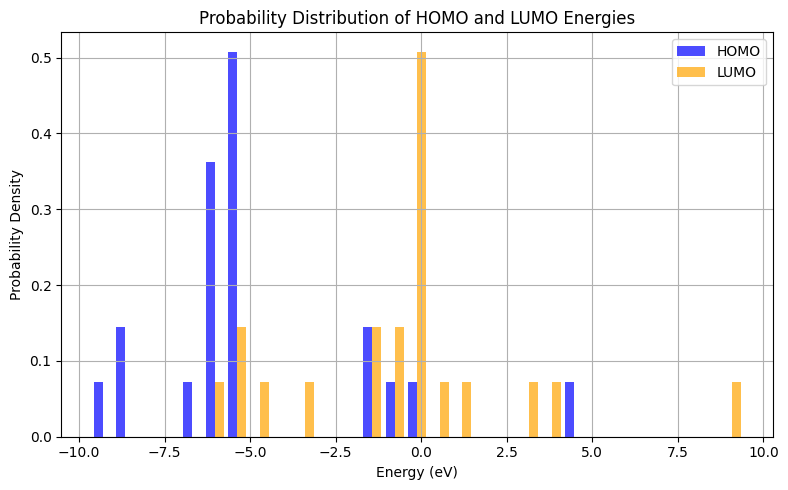

✅ Probability distribution CSV and plot created successfully.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Load your CSV file
# -----------------------------
df = pd.read_csv("HOMO-LUMO-blindset.csv")  # Replace with your actual filename

# Clean column names
df.columns = [col.strip() for col in df.columns]
homo_col = "HOMO" if "HOMO" in df.columns else "HOMO (eV)"
lumo_col = "LUMO" if "LUMO" in df.columns else "LUMO (eV)"

# -----------------------------
# Define common bin range for both HOMO and LUMO
# -----------------------------
combined_min = min(df[homo_col].min(), df[lumo_col].min())
combined_max = max(df[homo_col].max(), df[lumo_col].max())
bins = np.linspace(combined_min, combined_max, 30)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# -----------------------------
# Calculate histograms (PDFs)
# -----------------------------
homo_counts, _ = np.histogram(df[homo_col], bins=bins, density=True)
lumo_counts, _ = np.histogram(df[lumo_col], bins=bins, density=True)

# -----------------------------
# Save to CSV for Origin
# -----------------------------
prob_df = pd.DataFrame({
    "Energy (eV)": bin_centers,
    "HOMO_Probability": homo_counts,
    "LUMO_Probability": lumo_counts
})
prob_df.to_csv("HOMO_LUMO_probability_distribution-blindset.csv", index=False)

# -----------------------------
# Plot both distributions
# -----------------------------
plt.figure(figsize=(8, 5))
bar_width = (bin_centers[1] - bin_centers[0]) * 0.4

plt.bar(bin_centers - bar_width/2, homo_counts, width=bar_width, label="HOMO", alpha=0.7, color="blue")
plt.bar(bin_centers + bar_width/2, lumo_counts, width=bar_width, label="LUMO", alpha=0.7, color="orange")

plt.xlabel("Energy (eV)")
plt.ylabel("Probability Density")
plt.title("Probability Distribution of HOMO and LUMO Energies")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("✅ Probability distribution CSV and plot created successfully.")

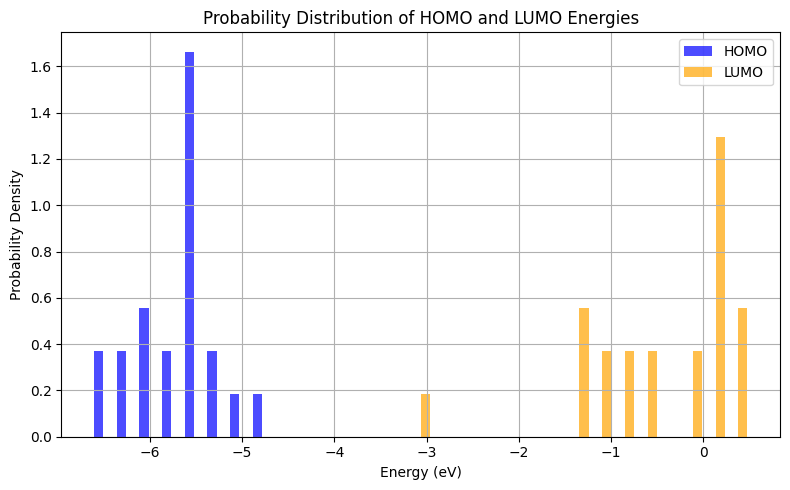

✅ Probability distribution CSV and plot created successfully.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Load your CSV file
# -----------------------------
df = pd.read_csv("HOMO-LUMO-blindtest-ANDREW-Spartan.csv")  # Replace with your actual filename

# Clean column names
df.columns = [col.strip() for col in df.columns]
homo_col = "HOMO" if "HOMO" in df.columns else "HOMO (eV)"
lumo_col = "LUMO" if "LUMO" in df.columns else "LUMO (eV)"

# -----------------------------
# Define common bin range for both HOMO and LUMO
# -----------------------------
combined_min = min(df[homo_col].min(), df[lumo_col].min())
combined_max = max(df[homo_col].max(), df[lumo_col].max())
bins = np.linspace(combined_min, combined_max, 30)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# -----------------------------
# Calculate histograms (PDFs)
# -----------------------------
homo_counts, _ = np.histogram(df[homo_col], bins=bins, density=True)
lumo_counts, _ = np.histogram(df[lumo_col], bins=bins, density=True)

# -----------------------------
# Save to CSV for Origin
# -----------------------------
prob_df = pd.DataFrame({
    "Energy (eV)": bin_centers,
    "HOMO_Probability": homo_counts,
    "LUMO_Probability": lumo_counts
})
prob_df.to_csv("HOMO_LUMO_probability_distribution-blindset-Andrew-Spartan.csv", index=False)

# -----------------------------
# Plot both distributions
# -----------------------------
plt.figure(figsize=(8, 5))
bar_width = (bin_centers[1] - bin_centers[0]) * 0.4

plt.bar(bin_centers - bar_width/2, homo_counts, width=bar_width, label="HOMO", alpha=0.7, color="blue")
plt.bar(bin_centers + bar_width/2, lumo_counts, width=bar_width, label="LUMO", alpha=0.7, color="orange")

plt.xlabel("Energy (eV)")
plt.ylabel("Probability Density")
plt.title("Probability Distribution of HOMO and LUMO Energies")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("✅ Probability distribution CSV and plot created successfully.")